<a href="https://colab.research.google.com/github/yvsr7/DeeplearningJ055/blob/master/J055_Lab7(ii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to get Images from ImageNet with Python in Google Colaboratory

The first step to train a model for image recognition is finding images that belong to the desired class (or classes), and ImageNet is very useful for this because it currently has 14,197,122 images with 21841 synsets indexed. ImageNet aims to provide on average 1000 images to illustrate each one of their 100,000 synsets, the majority of the synsets are nouns (80.000+).

For instance if the synset needed is pictures of ships it can be found by searching for ship on the imagenet website and the result will be the following page which has the wnid: n04194289

#Get the list of URLs for the images of the synset:

Said list of URLs can be downloaded from the URL http://www.image-net.org/api/text/imagenet.synset.geturls?wnid= followed by the wnid so in the case of ships it would be “http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289" this can be done with the Python library BeautifulSoup:

#Data augmentation - Flow from dataframe

In [0]:
#code part 1
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

tuskers_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265")#tuskers synset
print(tuskers_page.content)
tuskers_soup = BeautifulSoup(tuskers_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
afri_ele_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02084071")#African Elephant synset
print(afri_ele_page.content)
afri_ele_soup = BeautifulSoup(afri_ele_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
ind_ele_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013")#Indian Elephant synset
print(ind_ele_page.content)
ind_ele_soup = BeautifulSoup(ind_ele_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

#code part 2
tuskers_str_soup=str(tuskers_soup)#convert soup to string so it can be split
type(tuskers_str_soup)
tuskers_split_urls=tuskers_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(tuskers_split_urls))#print the length of the list so you know how many urls you have

#code part 2.1
afri_ele_str_soup=str(afri_ele_soup)#convert soup to string so it can be split
type(afri_ele_str_soup)
afri_ele_split_urls=afri_ele_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(afri_ele_split_urls))

#code part 2.2
ind_ele_str_soup=str(ind_ele_soup)#convert soup to string so it can be split
type(ind_ele_str_soup)
ind_ele_split_urls=ind_ele_str_soup.split('\r\n')#split so each url is a different position on a list
print(len(ind_ele_split_urls))


!mkdir /content/elephants_train/ 
!mkdir /content/elephants_test/ 

img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

n_of_training_images=150#the number of training images to use
for progress in range(n_of_training_images):#store all the images on a directory
 
    if(progress%20==0):
        print(progress)
    if not tuskers_split_urls[progress] == None:
      try:
        I = url_to_image(tuskers_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/elephants_train/tuskers.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):#store all the images on a directory
  
    if(progress%20==0):
        print(progress)
    if not afri_ele_split_urls[progress] == None:
      try:
        I = url_to_image(afri_ele_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/elephants_train/afriele.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):#store all the images on a directory
  
    if(progress%20==0):
        print(progress)
    if not ind_ele_split_urls[progress] == None:
      try:
        I = url_to_image(ind_ele_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/elephants_train/indele.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

b'http://farm1.static.flickr.com/159/414792641_5ff1ab1582.jpg\r\nhttp://static.flickr.com/92/229750451_82302cdf63.jpg\r\nhttp://ianlockwood.files.wordpress.com/2007/03/peraheratuskertracks_2lr2_07.jpg\r\nhttp://www.clementfrancis.com/mammalimages/elephant1_tn.jpg\r\nhttp://farm2.static.flickr.com/1094/890950932_4650abb8f6.jpg\r\nhttp://www.btinternet.com/~j.j.peirson/DAWN1b16.jpg\r\nhttp://farm1.static.flickr.com/138/381356986_6819268876.jpg\r\nhttp://farm1.static.flickr.com/95/230958807_7694968936.jpg\r\nhttp://www.rsp-photos.com/photos/12937c.jpg\r\nhttp://static.flickr.com/212/510656544_933215ec3f.jpg\r\nhttp://www.gdtphoto.com/pics/elephant/slides/Old%20Tusker.jpg\r\nhttp://farm1.static.flickr.com/85/231454426_1f8f5b6706.jpg\r\nhttp://static.flickr.com/58/229061136_bda26507e7.jpg\r\nhttp://farm2.static.flickr.com/1286/756074271_303ffa32b6.jpg\r\nhttp://farm1.static.flickr.com/36/114169842_eb30bbcaf9.jpg\r\nhttp://www.yvonnevandermey.nl/images/elephant%20big%20tusker%20Duke-crossing

#Test data images

In [0]:
#Validation data:

for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not tuskers_split_urls[progress] == None:
      try:
        I = url_to_image(tuskers_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/elephants_test/tuskers.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for African Elephants:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not afri_ele_split_urls[progress] == None:
      try:
        I = url_to_image(afri_ele_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/elephants_test/afriele.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for Indian Elephants:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not ind_ele_split_urls[progress] == None:
      try:
        I = url_to_image(ind_ele_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/elephants_test/indele.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
0
20
40
0
20
40


#Save images to folder

In [0]:
# Path to the train folder
import os
original_train = '/content/elephants_train/'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'tuskers':
        categories.append('0')
    elif category == 'afriele':
        categories.append('1')
    else:
        categories.append('2')

#Create dataframe from folder

In [0]:
import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})

data.to_csv("original_elephants.csv",index=False)

#Create dataframe for test 

In [0]:
# Path to the train folder
import os
original_test = '/content/elephants_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'tuskers':
        categories.append('0')
    elif category == 'afriele':
        categories.append('1')
    else:
        categories.append('2')

import pandas as pd
data_test = pd.DataFrame({'filename':filenames,'label':categories})

data_test.to_csv("elephants_test.csv",index=False)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)


test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=10,
                                             subset='training',
                                             shuffle=True,
                                             seed=7)
 
validation_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=10,
                                             subset='validation',
                                             shuffle=True,
                                             seed=7)

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=data_test,
directory="/content/elephants_test/",
x_col="filename",
y_col=None,
batch_size=10,
seed=42,
shuffle=False,
class_mode=None,
target_size=(150,150))

Found 211 validated image filenames belonging to 3 classes.
Found 52 validated image filenames belonging to 3 classes.
Found 102 validated image filenames.


#Model building

In [0]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size



model = Sequential()
#We need to use a Conv2D layer at start of the neural network 
#the syntax is Conv2D(1, (image_width,image_height), padding="valid", activation="relu", input_shape=X_train.shape[1:])
#the we add a flatten layer
model.add(Conv2D(512, (150, 150), padding="valid", activation="relu", input_shape=(150, 150, 3)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

Epoch 1/10





21/21 [==============================] - 16s 785ms/step - loss: 6.9373 - acc: 0.5306 - val_loss: 6.4121 - val_acc: 0.6000
Epoch 2/10
21/21 [==============================] - 2s 102ms/step - loss: 6.6291 - acc: 0.5865 - val_loss: 6.8701 - val_acc: 0.5714
Epoch 3/10
21/21 [==============================] - 2s 102ms/step - loss: 6.7311 - acc: 0.5801 - val_loss: 6.3612 - val_acc: 0.6032
Epoch 4/10
21/21 [==============================] - 2s 94ms/step - loss: 6.6801 - acc: 0.5833 - val_loss: 6.6157 - val_acc: 0.5873
Epoch 5/10
21/21 [==============================] - 2s 87ms/step - loss: 7.6272 - acc: 0.5242 - val_loss: 6.6157 - val_acc: 0.5873
Epoch 6/10
21/21 [==============================] - 2s 85ms/step - loss: 6.7821 - acc: 0.5769 - val_loss: 6.6157 - val_acc: 0.5873
Epoch 7/10
21/21 [==============================] - 2s 87ms/step - loss: 6.6074 - acc: 0.5878 - val_loss: 6.4121 - val_acc: 0.6000
Epoch 8/10
21/21 [==============================] - 2s 110ms/step - loss: 

#Evaluate the model

In [0]:
model.evaluate_generator(generator=validation_generator,steps=STEP_SIZE_TEST)

[6.5050244642340616, 0.5942029220902402]

#Measure the performance on validation set

In [0]:
from sklearn.metrics import roc_auc_score

# AUC for prediction on validation sample
X_val_sample, val_labels = next(validation_generator)
val_pred = model.predict_proba(X_val_sample)
val_pred = np.reshape(val_pred, val_labels.shape)
val_score_auc = roc_auc_score(val_labels, val_pred)
print ("AUC validation score")
print (val_score_auc)
print ('\n')

AUC validation score
0.5




#Predict the output

In [0]:
test_generator.reset()
pred=model.predict_generator(test_generator)

predictions = []
for i in range(0,102):
    if pred[i][0] >=0.5:
        predictions.append('0')
    elif pred[i][1] >=0.5:
        predictions.append('1')
    elif pred[i][2] >=0.5:
        predictions.append('2')   
 
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})


results.to_csv("results_elephants_test.csv",index=False)

In [0]:
pred

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

#Confusion matrix

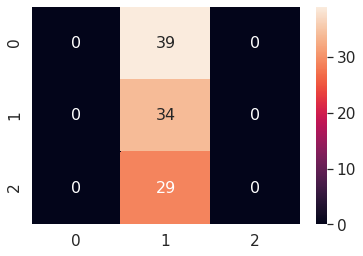

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm=confusion_matrix(data_test['label'],results['Predictions'])

sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


#Thank you for completing the notebook